# Model Training

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("../dataset/Algerian_forest_fires_dataset_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
# drop day , month ,year columns
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
# Encode the classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)


In [11]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


## Split data intod ependent and independent features

In [14]:
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [17]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [18]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

## Split Data Into train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [20]:
## features selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

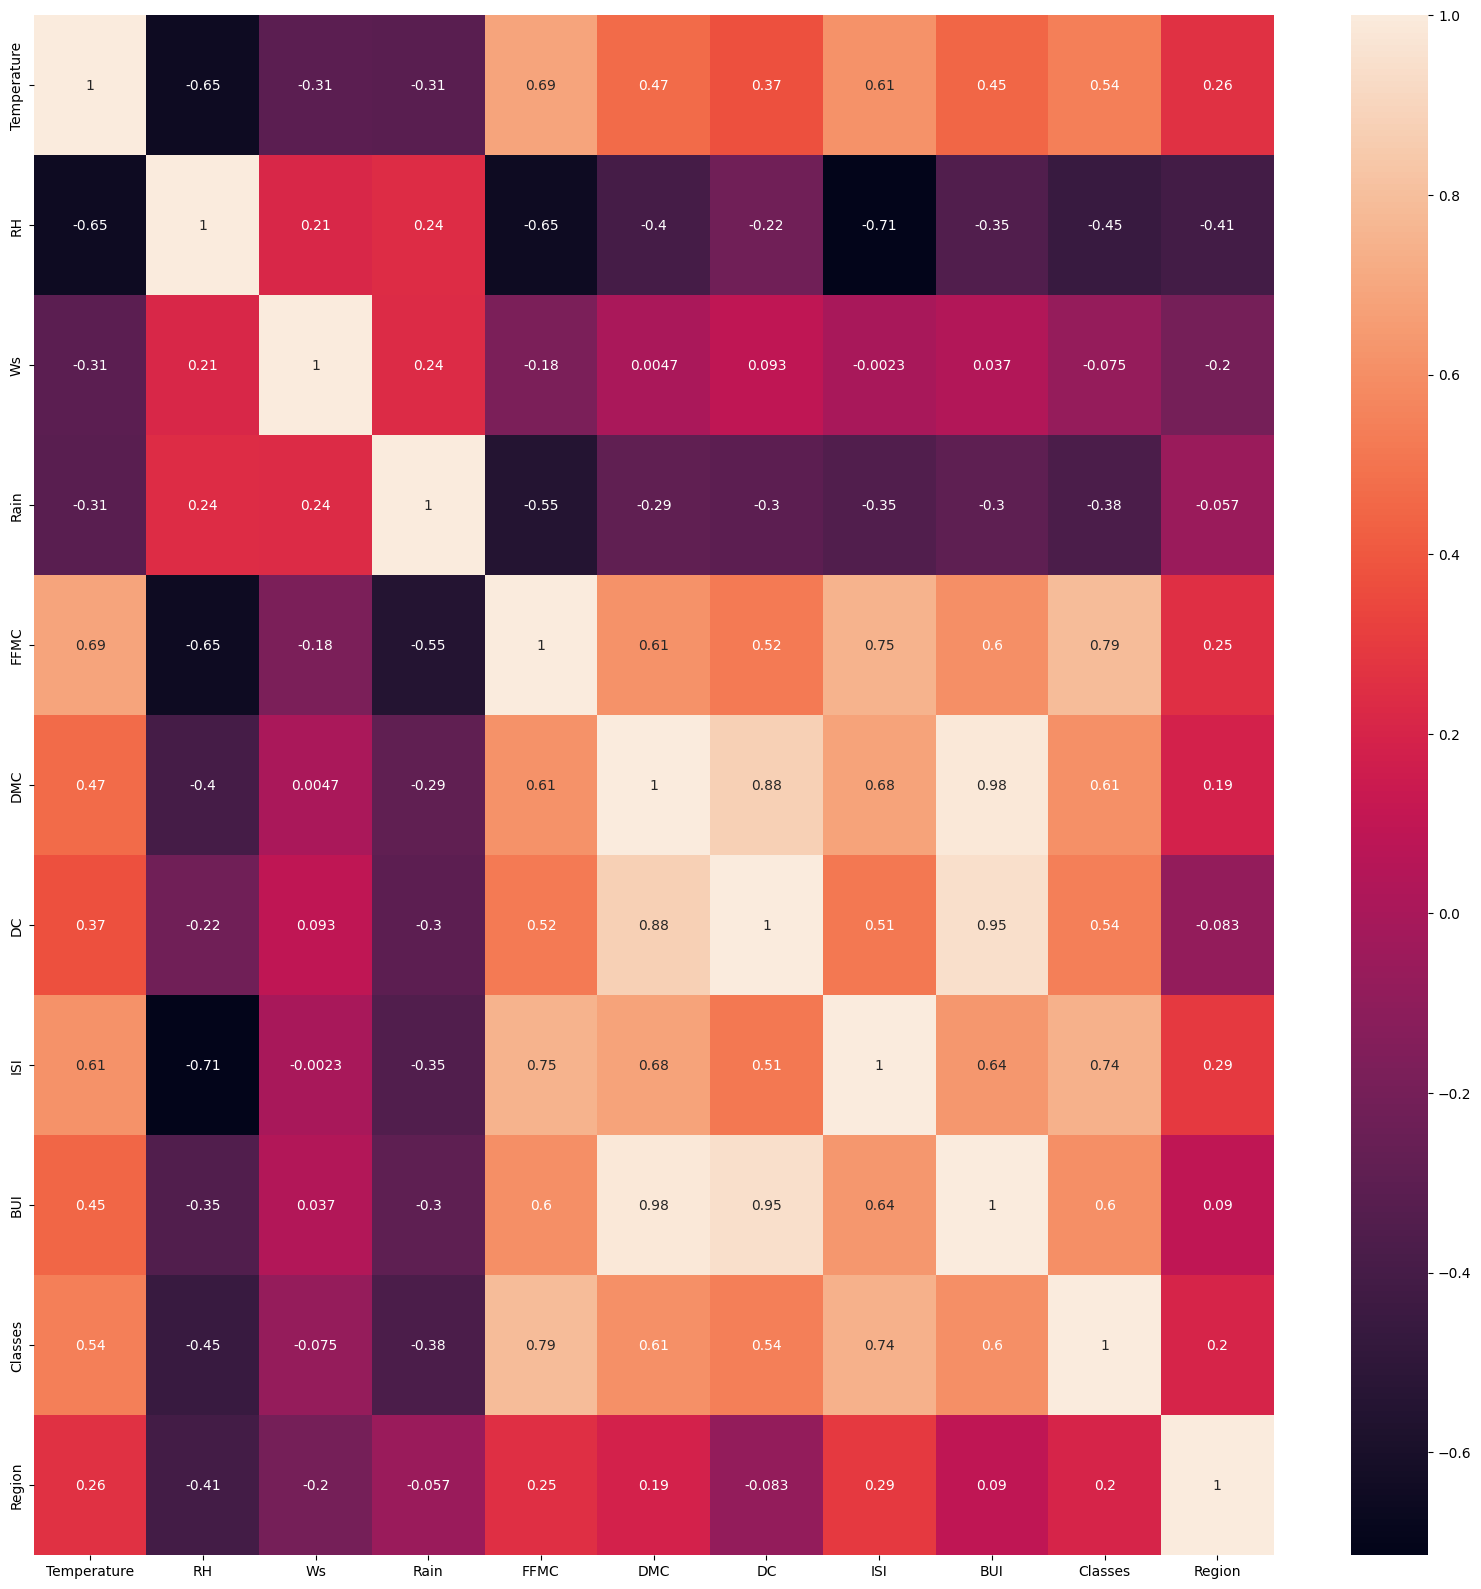

In [23]:
# check for muliLinearity
plt.figure(figsize=(20, 20))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [22]:
def correlation(datasets , threshold):
  col_corr = set()
  corr_matrix = datasets.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)

  return col_corr

In [24]:
# threshold --Domain expertise
corr_features = correlation(X_train , 0.85)
corr_features

{'BUI', 'DC'}

In [25]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features , axis=1, inplace=True)
X_test.drop(corr_features , axis=1, inplace=True)

In [26]:
X_train.shape , X_test.shape

((194, 9), (49, 9))

## Feature Scaling or Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8
0,-0.875632,0.213218,1.285770,-0.092069,-0.695683,-0.743420,-0.796488,-1.144344,-1.010363
1,0.222091,-1.654849,0.145041,-0.380156,1.001200,3.530889,1.887575,0.873863,0.989743
2,1.594244,-1.254549,-0.995688,-0.140083,0.490005,-0.168916,-0.194888,0.873863,0.989743
3,-0.326771,-1.321266,2.046257,-0.380156,0.887601,0.229407,1.956990,0.873863,0.989743
4,0.496522,0.146502,-0.615445,-0.380156,0.766902,1.937598,0.938897,0.873863,-1.010363
...,...,...,...,...,...,...,...,...,...
189,-2.247786,1.347402,-0.235202,-0.188098,-2.357067,-1.095782,-1.097289,-1.144344,-1.010363
190,-1.150063,1.213969,0.525284,1.108293,-2.037570,-0.934921,-1.051012,-1.144344,-1.010363
191,-1.973355,0.947102,0.525284,3.076885,-2.278968,-1.065142,-1.097289,-1.144344,-1.010363
192,0.496522,-0.187082,0.145041,-0.380156,0.710103,0.328987,0.568682,0.873863,0.989743


In [36]:
X_train_scaled.shape , X_test_scaled.shape

((194, 9), (49, 9))

### Box Plots To understand Effect Of Standard Scaler

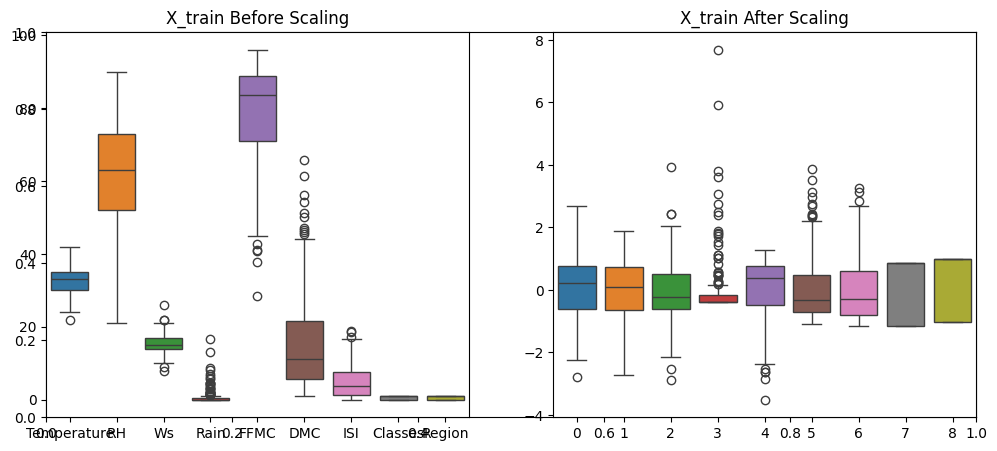

In [29]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")
plt.show() 

## Linear Regression Problem

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)

Mean Squared Error: 0.5882990110708648
R2 Score: 0.9805895859259883


Text(0.5, 1.0, 'Actual vs Predicted Values')

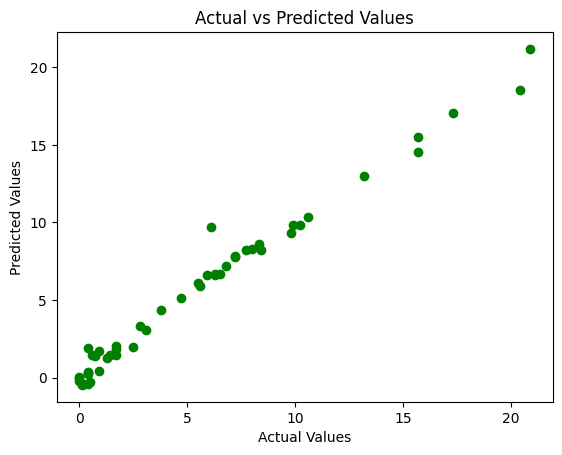

In [32]:
plt.scatter(y_test, y_pred , color='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

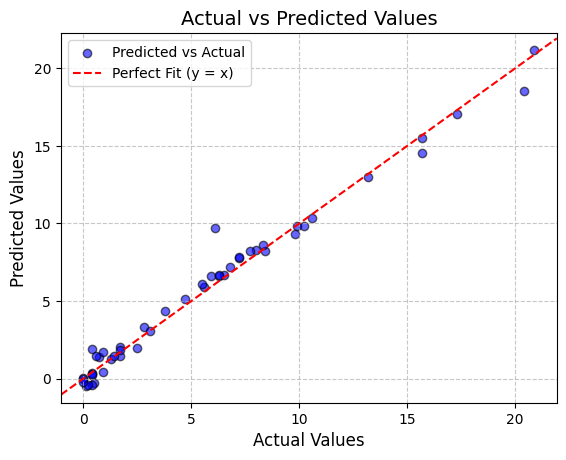

In [33]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k', label="Predicted vs Actual")
plt.xlabel("Actual Values", fontsize=12)  # Label for x-axis
plt.ylabel("Predicted Values", fontsize=12)  # Label for y-axis
plt.title("Actual vs Predicted Values", fontsize=14)  # Title
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', label="Perfect Fit (y = x)")  # y = x line
plt.legend()  # Show legend
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
plt.show()

## Lasso Regression

Mean Squared Error: 1.726042325023142
R2 Score: 0.9430507350726562


Text(0.5, 1.0, 'Actual vs Predicted Values Lasso Regression')

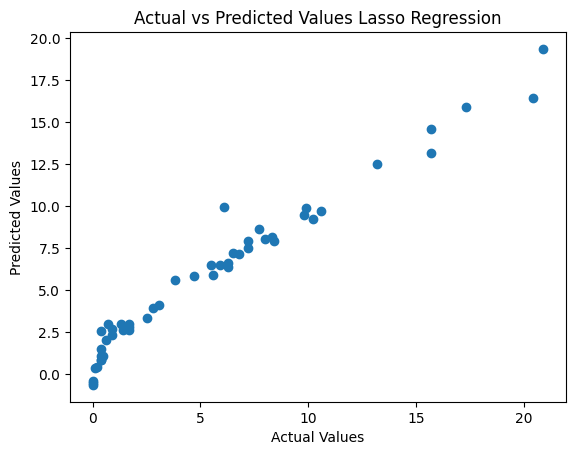

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
lassoreg = Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred = lassoreg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values Lasso Regression")

In [37]:
lassoreg.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        3.11343121,  4.04219354,  0.        , -0.        ])

In [38]:
lassoreg.intercept_

np.float64(7.420103092783505)

## LassoCV Regression

In [39]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(cv=5, random_state=0)
lassoregcv.fit(X_train_scaled,y_train)

LassoCV(cv=5, random_state=0)

In [45]:
len(lassoregcv.alphas_)

100

In [47]:
X_train_scaled.shape

(194, 9)

Mean Squared Error: 1.726042325023142
R2 Score: 0.978328234520343


Text(0.5, 1.0, 'Actual vs Predicted Values LassoCv Regression')

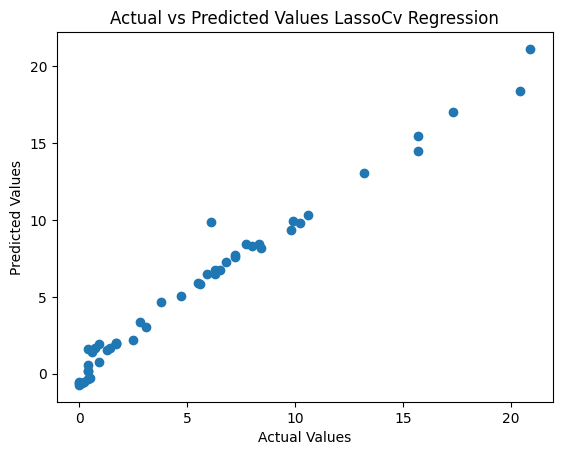

In [48]:
y_pred = lassoregcv.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values LassoCv Regression")

## Ridge Regression

Mean Squared Error: 0.6029616070548557
R2 Score: 0.9801058063273602


Text(0.5, 1.0, 'Actual vs Predicted Values')

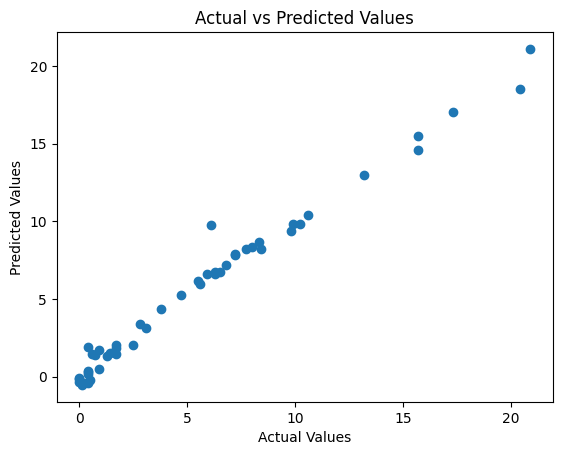

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
RidgeReg = Ridge()
RidgeReg.fit(X_train_scaled,y_train)
y_pred = RidgeReg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

Mean Squared Error: 0.8419867979327424
R2 Score: 0.9722193780965628


Text(0.5, 1.0, 'Actual vs Predicted Values')

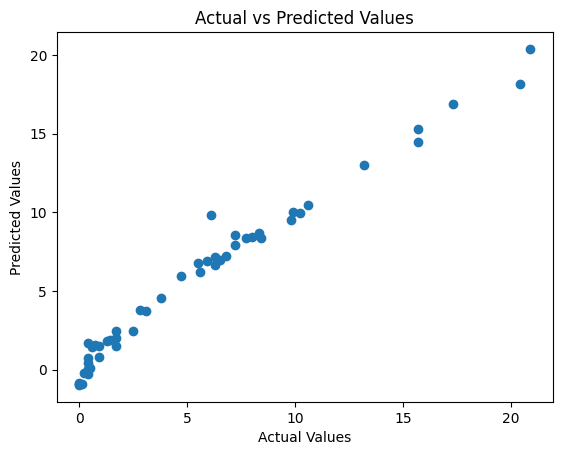

In [50]:
from sklearn.linear_model import RidgeCV
RidgeRegcv = RidgeCV(cv=5)
RidgeRegcv.fit(X_train_scaled,y_train)
y_pred = RidgeRegcv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

In [51]:
RidgeRegcv.alphas , RidgeRegcv.alpha_

((0.1, 1.0, 10.0), np.float64(10.0))

In [54]:
RidgeRegcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticNet Regression

Mean Squared Error: 4.009921298441002
R2 Score: 0.8676961352267807


Text(0.5, 1.0, 'Actual vs Predicted Values')

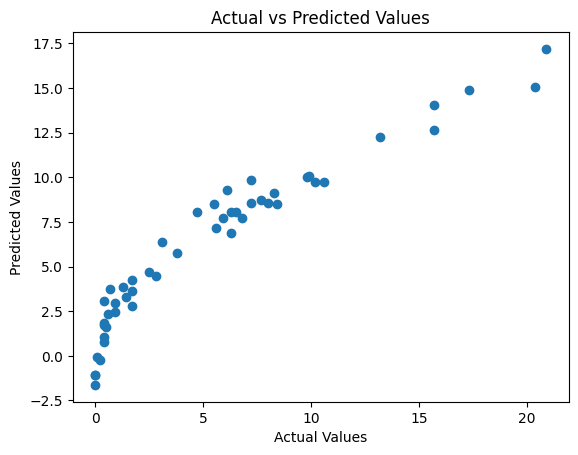

In [52]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error , r2_score
ElastcReg = ElasticNet()
ElastcReg.fit(X_train_scaled,y_train)
y_pred = ElastcReg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

Mean Squared Error: 0.6637102658943733
R2 Score: 0.9781014571778188


Text(0.5, 1.0, 'Actual vs Predicted Values')

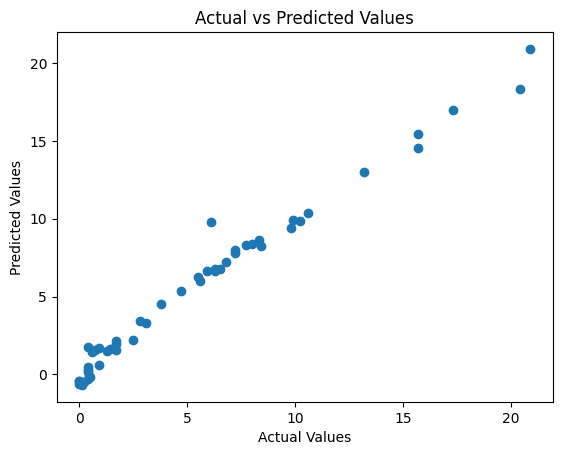

In [53]:
from sklearn.linear_model import ElasticNetCV
ElasticRegcv = ElasticNetCV(cv=5)
ElasticRegcv.fit(X_train_scaled,y_train)
y_pred = ElasticRegcv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")